In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [2]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [3]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [23]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x.copy()
        for i in range(y.size):
            for k in range(randint(0,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [24]:
x_n, y_n=make_noise(x,y)

In [25]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [26]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [27]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [28]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [11]:
## Run LR on original features!
#orig_lr2 = LRGD(alpha=10.0, step_size=0.1)
#orig_lr2.fit(x_te, y_te)

In [12]:
#y_hat_Origin=np.asarray(orig_lr2.predict_proba(x_va)[:,1]).reshape(-1)
#tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
#acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
#print("Origin Accuracy", acc)

In [13]:
## Run LR on transformed features!
#new_lr2 = LRGDF(alpha=10.0, step_size=0.1)
#new_lr2.fit(x_te, y_te)

 ## self.feature_transform
 self.feature_transform_pipeline = sklearn.pipeline.Pipeline(
                    [('rescaler', sklearn.preprocessing.MinMaxScaler()),  
                    ('feature_transform', sklearn.pipeline.FeatureUnion(transformer_list=[  
                    ('original_x', sklearn.preprocessing.PolynomialFeatures(degree=1, include_bias=False)),  
                    ('TurnOn_x', TurnOnFeatureExtractor()),  
                    ('TurnOn_x2', TurnOnOnceFeatureExtractor()),  
                    ('TurnOn_all', TurnOnAllFeatureExtractor()),  
                    ('TurnOn_y', TurnOnFeatureExtractorY()),  
                    ('TurnOn_y2', TurnOnOnceFeatureExtractorY()),  
                    ('squared_x', SquaredFeatureExtractor()),  
                    ]),

In [14]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

With MinMax Transform
TurnOn Loaded 0.0
(1, 8400)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Square Loaded!
Shape of Transformed Data (8400, 1574)
Initializing w_G with 1574 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.027764  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.914183  avg_L1_norm_grad         0.033593  w[0]    0.000 bias    0.000
iter    2/1000000  loss         0.880440  avg_L1_norm_grad         0.035470  w[0]    0.000 bias    0.031
iter    3/1000000  loss         0.913287  avg_L1_norm_grad         0.042291  w[0]    0.000 bias    0.018
iter    4/1000000  loss         0.807783  avg_L1_norm_grad         0.034863  w[0]    0.000 bias    0.056
iter    5/1000000  loss         0.815084  avg_L1_norm_grad         0.035766  w[0]    0.000 bias    0.041
iter    6/1000000  loss         0.711749  avg_L1_norm_grad         

iter 2900/1000000  loss         0.173437  avg_L1_norm_grad         0.000084  w[0]    0.000 bias    1.203
iter 2901/1000000  loss         0.173434  avg_L1_norm_grad         0.000084  w[0]    0.000 bias    1.203
iter 3000/1000000  loss         0.173173  avg_L1_norm_grad         0.000081  w[0]    0.000 bias    1.211
iter 3001/1000000  loss         0.173170  avg_L1_norm_grad         0.000081  w[0]    0.000 bias    1.211
iter 3100/1000000  loss         0.172928  avg_L1_norm_grad         0.000078  w[0]    0.000 bias    1.217
iter 3101/1000000  loss         0.172926  avg_L1_norm_grad         0.000078  w[0]    0.000 bias    1.218
iter 3200/1000000  loss         0.172701  avg_L1_norm_grad         0.000075  w[0]    0.000 bias    1.224
iter 3201/1000000  loss         0.172699  avg_L1_norm_grad         0.000075  w[0]    0.000 bias    1.224
iter 3300/1000000  loss         0.172490  avg_L1_norm_grad         0.000072  w[0]    0.000 bias    1.230
iter 3301/1000000  loss         0.172488  avg_L1_norm_g

iter 6900/1000000  loss         0.169624  avg_L1_norm_grad         0.000025  w[0]    0.000 bias    1.351
iter 6901/1000000  loss         0.169624  avg_L1_norm_grad         0.000025  w[0]    0.000 bias    1.351
iter 7000/1000000  loss         0.169600  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.352
iter 7001/1000000  loss         0.169600  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.352
iter 7100/1000000  loss         0.169578  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.354
iter 7101/1000000  loss         0.169578  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.354
iter 7200/1000000  loss         0.169557  avg_L1_norm_grad         0.000023  w[0]    0.000 bias    1.356
iter 7201/1000000  loss         0.169557  avg_L1_norm_grad         0.000023  w[0]    0.000 bias    1.356
iter 7300/1000000  loss         0.169537  avg_L1_norm_grad         0.000023  w[0]    0.000 bias    1.357
iter 7301/1000000  loss         0.169537  avg_L1_norm_g

iter 10800/1000000  loss         0.169213  avg_L1_norm_grad         0.000010  w[0]    0.000 bias    1.392
iter 10801/1000000  loss         0.169213  avg_L1_norm_grad         0.000010  w[0]    0.000 bias    1.392
iter 10900/1000000  loss         0.169209  avg_L1_norm_grad         0.000010  w[0]    0.000 bias    1.392
iter 10901/1000000  loss         0.169209  avg_L1_norm_grad         0.000010  w[0]    0.000 bias    1.392
iter 11000/1000000  loss         0.169206  avg_L1_norm_grad         0.000009  w[0]    0.000 bias    1.393
iter 11001/1000000  loss         0.169206  avg_L1_norm_grad         0.000009  w[0]    0.000 bias    1.393
iter 11100/1000000  loss         0.169203  avg_L1_norm_grad         0.000009  w[0]    0.000 bias    1.393
iter 11101/1000000  loss         0.169203  avg_L1_norm_grad         0.000009  w[0]    0.000 bias    1.393
iter 11200/1000000  loss         0.169200  avg_L1_norm_grad         0.000009  w[0]    0.000 bias    1.394
iter 11201/1000000  loss         0.169200  avg

iter 1400/1000000  loss         0.207772  avg_L1_norm_grad         0.000245  w[0]    0.000 bias    2.004
iter 1401/1000000  loss         0.207760  avg_L1_norm_grad         0.000245  w[0]    0.000 bias    2.004
iter 1500/1000000  loss         0.206677  avg_L1_norm_grad         0.000228  w[0]    0.000 bias    2.029
iter 1501/1000000  loss         0.206667  avg_L1_norm_grad         0.000228  w[0]    0.000 bias    2.030
iter 1600/1000000  loss         0.205728  avg_L1_norm_grad         0.000213  w[0]    0.000 bias    2.052
iter 1601/1000000  loss         0.205719  avg_L1_norm_grad         0.000213  w[0]    0.000 bias    2.052
iter 1700/1000000  loss         0.204899  avg_L1_norm_grad         0.000200  w[0]    0.000 bias    2.071
iter 1701/1000000  loss         0.204892  avg_L1_norm_grad         0.000200  w[0]    0.000 bias    2.071
iter 1800/1000000  loss         0.204171  avg_L1_norm_grad         0.000189  w[0]    0.000 bias    2.089
iter 1801/1000000  loss         0.204164  avg_L1_norm_g

iter 5400/1000000  loss         0.197415  avg_L1_norm_grad         0.000045  w[0]    0.000 bias    2.213
iter 5401/1000000  loss         0.197414  avg_L1_norm_grad         0.000045  w[0]    0.000 bias    2.213
iter 5500/1000000  loss         0.197380  avg_L1_norm_grad         0.000044  w[0]    0.000 bias    2.212
iter 5501/1000000  loss         0.197379  avg_L1_norm_grad         0.000044  w[0]    0.000 bias    2.212
iter 5600/1000000  loss         0.197347  avg_L1_norm_grad         0.000042  w[0]    0.000 bias    2.212
iter 5601/1000000  loss         0.197346  avg_L1_norm_grad         0.000042  w[0]    0.000 bias    2.212
iter 5700/1000000  loss         0.197316  avg_L1_norm_grad         0.000041  w[0]    0.000 bias    2.212
iter 5701/1000000  loss         0.197316  avg_L1_norm_grad         0.000041  w[0]    0.000 bias    2.212
iter 5800/1000000  loss         0.197287  avg_L1_norm_grad         0.000040  w[0]    0.000 bias    2.212
iter 5801/1000000  loss         0.197287  avg_L1_norm_g

iter 9400/1000000  loss         0.196851  avg_L1_norm_grad         0.000015  w[0]    0.000 bias    2.200
iter 9401/1000000  loss         0.196851  avg_L1_norm_grad         0.000015  w[0]    0.000 bias    2.200
iter 9500/1000000  loss         0.196847  avg_L1_norm_grad         0.000015  w[0]    0.000 bias    2.200
iter 9501/1000000  loss         0.196847  avg_L1_norm_grad         0.000015  w[0]    0.000 bias    2.200
iter 9600/1000000  loss         0.196844  avg_L1_norm_grad         0.000015  w[0]    0.000 bias    2.200
iter 9601/1000000  loss         0.196844  avg_L1_norm_grad         0.000015  w[0]    0.000 bias    2.200
iter 9700/1000000  loss         0.196840  avg_L1_norm_grad         0.000014  w[0]    0.000 bias    2.200
iter 9701/1000000  loss         0.196840  avg_L1_norm_grad         0.000014  w[0]    0.000 bias    2.200
Done. Converged after 9785 iterations.


In [15]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9577777777777512
TurnOn Loaded 0.0
(1, 3600)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Square Loaded!
No Noise New 0.9633333333333065


In [16]:
## Run LR on original features!
orig_lr22 = LRGD(alpha=10.0, step_size=0.1)
orig_lr22.fit(x_te, y_te)

Shape of Transformed Data (84000, 785)
Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.031734  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.905841  avg_L1_norm_grad         0.026133  w[0]    0.000 bias    0.000
iter    2/1000000  loss         0.840862  avg_L1_norm_grad         0.018532  w[0]    0.000 bias    0.022
iter    3/1000000  loss         0.798216  avg_L1_norm_grad         0.015840  w[0]    0.000 bias    0.028
iter    4/1000000  loss         0.766661  avg_L1_norm_grad         0.012919  w[0]    0.000 bias    0.044
iter    5/1000000  loss         0.742190  avg_L1_norm_grad         0.011807  w[0]    0.000 bias    0.053
iter    6/1000000  loss         0.721968  avg_L1_norm_grad         0.010532  w[0]    0.000 bias    0.065
iter    7/1000000  loss         0.704564  avg_L1_norm_grad         0.009869  w[0]    0.000 bias    0.075

iter 3000/1000000  loss         0.162134  avg_L1_norm_grad         0.000185  w[0]    0.000 bias    2.611
iter 3001/1000000  loss         0.162127  avg_L1_norm_grad         0.000185  w[0]    0.000 bias    2.612
iter 3100/1000000  loss         0.161493  avg_L1_norm_grad         0.000181  w[0]    0.000 bias    2.624
iter 3101/1000000  loss         0.161487  avg_L1_norm_grad         0.000181  w[0]    0.000 bias    2.624
iter 3200/1000000  loss         0.160884  avg_L1_norm_grad         0.000177  w[0]    0.000 bias    2.636
iter 3201/1000000  loss         0.160878  avg_L1_norm_grad         0.000177  w[0]    0.000 bias    2.636
iter 3300/1000000  loss         0.160303  avg_L1_norm_grad         0.000173  w[0]    0.000 bias    2.647
iter 3301/1000000  loss         0.160298  avg_L1_norm_grad         0.000173  w[0]    0.000 bias    2.647
iter 3400/1000000  loss         0.159749  avg_L1_norm_grad         0.000169  w[0]    0.000 bias    2.657
iter 3401/1000000  loss         0.159744  avg_L1_norm_g

iter 7000/1000000  loss         0.148786  avg_L1_norm_grad         0.000100  w[0]   -0.000 bias    2.821
iter 7001/1000000  loss         0.148784  avg_L1_norm_grad         0.000100  w[0]   -0.000 bias    2.821
iter 7100/1000000  loss         0.148613  avg_L1_norm_grad         0.000099  w[0]   -0.000 bias    2.823
iter 7101/1000000  loss         0.148611  avg_L1_norm_grad         0.000099  w[0]   -0.000 bias    2.823
iter 7200/1000000  loss         0.148444  avg_L1_norm_grad         0.000098  w[0]   -0.000 bias    2.824
iter 7201/1000000  loss         0.148442  avg_L1_norm_grad         0.000098  w[0]   -0.000 bias    2.824
iter 7300/1000000  loss         0.148278  avg_L1_norm_grad         0.000097  w[0]   -0.000 bias    2.826
iter 7301/1000000  loss         0.148277  avg_L1_norm_grad         0.000097  w[0]   -0.000 bias    2.826
iter 7400/1000000  loss         0.148116  avg_L1_norm_grad         0.000096  w[0]   -0.000 bias    2.828
iter 7401/1000000  loss         0.148115  avg_L1_norm_g

iter 10900/1000000  loss         0.144062  avg_L1_norm_grad         0.000071  w[0]   -0.000 bias    2.857
iter 10901/1000000  loss         0.144061  avg_L1_norm_grad         0.000071  w[0]   -0.000 bias    2.857
iter 11000/1000000  loss         0.143979  avg_L1_norm_grad         0.000070  w[0]   -0.000 bias    2.857
iter 11001/1000000  loss         0.143978  avg_L1_norm_grad         0.000070  w[0]   -0.000 bias    2.857
iter 11100/1000000  loss         0.143897  avg_L1_norm_grad         0.000069  w[0]   -0.000 bias    2.858
iter 11101/1000000  loss         0.143896  avg_L1_norm_grad         0.000069  w[0]   -0.000 bias    2.858
iter 11200/1000000  loss         0.143816  avg_L1_norm_grad         0.000069  w[0]   -0.000 bias    2.858
iter 11201/1000000  loss         0.143815  avg_L1_norm_grad         0.000069  w[0]   -0.000 bias    2.858
iter 11300/1000000  loss         0.143737  avg_L1_norm_grad         0.000068  w[0]   -0.000 bias    2.858
iter 11301/1000000  loss         0.143736  avg

iter 14800/1000000  loss         0.141571  avg_L1_norm_grad         0.000054  w[0]   -0.000 bias    2.868
iter 14801/1000000  loss         0.141570  avg_L1_norm_grad         0.000054  w[0]   -0.000 bias    2.868
iter 14900/1000000  loss         0.141523  avg_L1_norm_grad         0.000054  w[0]   -0.000 bias    2.868
iter 14901/1000000  loss         0.141522  avg_L1_norm_grad         0.000054  w[0]   -0.000 bias    2.868
iter 15000/1000000  loss         0.141475  avg_L1_norm_grad         0.000053  w[0]   -0.000 bias    2.868
iter 15001/1000000  loss         0.141475  avg_L1_norm_grad         0.000053  w[0]   -0.000 bias    2.868
iter 15100/1000000  loss         0.141428  avg_L1_norm_grad         0.000053  w[0]   -0.000 bias    2.868
iter 15101/1000000  loss         0.141428  avg_L1_norm_grad         0.000053  w[0]   -0.000 bias    2.868
iter 15200/1000000  loss         0.141382  avg_L1_norm_grad         0.000053  w[0]   -0.000 bias    2.868
iter 15201/1000000  loss         0.141382  avg

iter 18700/1000000  loss         0.140064  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 18701/1000000  loss         0.140064  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 18800/1000000  loss         0.140034  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 18801/1000000  loss         0.140033  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 18900/1000000  loss         0.140003  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 18901/1000000  loss         0.140003  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 19000/1000000  loss         0.139974  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 19001/1000000  loss         0.139973  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 19100/1000000  loss         0.139944  avg_L1_norm_grad         0.000043  w[0]   -0.000 bias    2.874
iter 19101/1000000  loss         0.139944  avg

iter 22600/1000000  loss         0.139083  avg_L1_norm_grad         0.000036  w[0]   -0.001 bias    2.878
iter 22601/1000000  loss         0.139083  avg_L1_norm_grad         0.000036  w[0]   -0.001 bias    2.878
iter 22700/1000000  loss         0.139062  avg_L1_norm_grad         0.000036  w[0]   -0.001 bias    2.878
iter 22701/1000000  loss         0.139062  avg_L1_norm_grad         0.000036  w[0]   -0.001 bias    2.878
iter 22800/1000000  loss         0.139042  avg_L1_norm_grad         0.000036  w[0]   -0.001 bias    2.878
iter 22801/1000000  loss         0.139042  avg_L1_norm_grad         0.000036  w[0]   -0.001 bias    2.878
iter 22900/1000000  loss         0.139022  avg_L1_norm_grad         0.000035  w[0]   -0.001 bias    2.878
iter 22901/1000000  loss         0.139022  avg_L1_norm_grad         0.000035  w[0]   -0.001 bias    2.878
iter 23000/1000000  loss         0.139002  avg_L1_norm_grad         0.000035  w[0]   -0.001 bias    2.878
iter 23001/1000000  loss         0.139002  avg

iter 26500/1000000  loss         0.138413  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26501/1000000  loss         0.138413  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26600/1000000  loss         0.138399  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26601/1000000  loss         0.138399  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26700/1000000  loss         0.138385  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26701/1000000  loss         0.138385  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26800/1000000  loss         0.138371  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26801/1000000  loss         0.138371  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26900/1000000  loss         0.138357  avg_L1_norm_grad         0.000030  w[0]   -0.001 bias    2.882
iter 26901/1000000  loss         0.138357  avg

iter 30400/1000000  loss         0.137941  avg_L1_norm_grad         0.000026  w[0]   -0.001 bias    2.885
iter 30401/1000000  loss         0.137941  avg_L1_norm_grad         0.000026  w[0]   -0.001 bias    2.885
iter 30500/1000000  loss         0.137931  avg_L1_norm_grad         0.000026  w[0]   -0.001 bias    2.885
iter 30501/1000000  loss         0.137931  avg_L1_norm_grad         0.000026  w[0]   -0.001 bias    2.885
iter 30600/1000000  loss         0.137921  avg_L1_norm_grad         0.000025  w[0]   -0.001 bias    2.885
iter 30601/1000000  loss         0.137921  avg_L1_norm_grad         0.000025  w[0]   -0.001 bias    2.885
iter 30700/1000000  loss         0.137911  avg_L1_norm_grad         0.000025  w[0]   -0.001 bias    2.885
iter 30701/1000000  loss         0.137911  avg_L1_norm_grad         0.000025  w[0]   -0.001 bias    2.885
iter 30800/1000000  loss         0.137901  avg_L1_norm_grad         0.000025  w[0]   -0.001 bias    2.886
iter 30801/1000000  loss         0.137901  avg

iter 34300/1000000  loss         0.137600  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34301/1000000  loss         0.137600  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34400/1000000  loss         0.137593  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34401/1000000  loss         0.137593  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34500/1000000  loss         0.137585  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34501/1000000  loss         0.137585  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34600/1000000  loss         0.137578  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34601/1000000  loss         0.137578  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34700/1000000  loss         0.137571  avg_L1_norm_grad         0.000022  w[0]   -0.001 bias    2.888
iter 34701/1000000  loss         0.137571  avg

iter 38200/1000000  loss         0.137349  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38201/1000000  loss         0.137349  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38300/1000000  loss         0.137344  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38301/1000000  loss         0.137344  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38400/1000000  loss         0.137338  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38401/1000000  loss         0.137338  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38500/1000000  loss         0.137333  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38501/1000000  loss         0.137333  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38600/1000000  loss         0.137327  avg_L1_norm_grad         0.000019  w[0]   -0.001 bias    2.891
iter 38601/1000000  loss         0.137327  avg

iter 42100/1000000  loss         0.137161  avg_L1_norm_grad         0.000017  w[0]   -0.001 bias    2.893
iter 42101/1000000  loss         0.137161  avg_L1_norm_grad         0.000017  w[0]   -0.001 bias    2.893
iter 42200/1000000  loss         0.137157  avg_L1_norm_grad         0.000017  w[0]   -0.001 bias    2.893
iter 42201/1000000  loss         0.137157  avg_L1_norm_grad         0.000017  w[0]   -0.001 bias    2.893
iter 42300/1000000  loss         0.137153  avg_L1_norm_grad         0.000016  w[0]   -0.001 bias    2.893
iter 42301/1000000  loss         0.137153  avg_L1_norm_grad         0.000016  w[0]   -0.001 bias    2.893
Done. Converged after 42352 iterations.
Origin Accuracy 0.9687499999999972


In [39]:
y_hat_Origin=np.asarray(orig_lr22.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

Origin Accuracy 0.965277777777775


In [33]:
## Run LR on transformed features!
new_lr1 = LRGDF(alpha=10.0, step_size=0.1)
new_lr1.fit(x_te, y_te)

With MinMax Transform
TurnOn Loaded 0.0
(1, 84000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Square Loaded!
Shape of Transformed Data (84000, 1574)
Initializing w_G with 1574 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.027314  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.912844  avg_L1_norm_grad         0.033884  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         0.880506  avg_L1_norm_grad         0.035253  w[0]    0.000 bias    0.031
iter    3/1000000  loss         0.914255  avg_L1_norm_grad         0.043552  w[0]    0.000 bias    0.017
iter    4/1000000  loss         0.812239  avg_L1_norm_grad         0.035536  w[0]    0.000 bias    0.055
iter    5/1000000  loss         0.820943  avg_L1_norm_grad         0.037429  w[0]    0.000 bias    0.040
iter    6/1000000  loss         0.714078  avg_L1_norm_grad       

iter 2900/1000000  loss         0.146248  avg_L1_norm_grad         0.000143  w[0]    0.015 bias    1.401
iter 2901/1000000  loss         0.146241  avg_L1_norm_grad         0.000143  w[0]    0.015 bias    1.401
iter 3000/1000000  loss         0.145529  avg_L1_norm_grad         0.000140  w[0]    0.016 bias    1.416
iter 3001/1000000  loss         0.145522  avg_L1_norm_grad         0.000140  w[0]    0.016 bias    1.416
iter 3100/1000000  loss         0.144840  avg_L1_norm_grad         0.000137  w[0]    0.016 bias    1.431
iter 3101/1000000  loss         0.144833  avg_L1_norm_grad         0.000137  w[0]    0.016 bias    1.432
iter 3200/1000000  loss         0.144180  avg_L1_norm_grad         0.000135  w[0]    0.016 bias    1.446
iter 3201/1000000  loss         0.144173  avg_L1_norm_grad         0.000135  w[0]    0.016 bias    1.447
iter 3300/1000000  loss         0.143546  avg_L1_norm_grad         0.000132  w[0]    0.017 bias    1.461
iter 3301/1000000  loss         0.143540  avg_L1_norm_g

iter 6801/1000000  loss         0.130323  avg_L1_norm_grad         0.000082  w[0]    0.026 bias    1.850
iter 6900/1000000  loss         0.130092  avg_L1_norm_grad         0.000081  w[0]    0.026 bias    1.859
iter 6901/1000000  loss         0.130089  avg_L1_norm_grad         0.000081  w[0]    0.026 bias    1.859
iter 7000/1000000  loss         0.129863  avg_L1_norm_grad         0.000080  w[0]    0.026 bias    1.868
iter 7001/1000000  loss         0.129860  avg_L1_norm_grad         0.000080  w[0]    0.026 bias    1.868
iter 7100/1000000  loss         0.129638  avg_L1_norm_grad         0.000079  w[0]    0.026 bias    1.876
iter 7101/1000000  loss         0.129636  avg_L1_norm_grad         0.000079  w[0]    0.026 bias    1.877
iter 7200/1000000  loss         0.129418  avg_L1_norm_grad         0.000078  w[0]    0.027 bias    1.885
iter 7201/1000000  loss         0.129416  avg_L1_norm_grad         0.000078  w[0]    0.027 bias    1.885
iter 7300/1000000  loss         0.129202  avg_L1_norm_g

iter 10701/1000000  loss         0.123732  avg_L1_norm_grad         0.000058  w[0]    0.032 bias    2.143
iter 10800/1000000  loss         0.123613  avg_L1_norm_grad         0.000058  w[0]    0.032 bias    2.150
iter 10801/1000000  loss         0.123611  avg_L1_norm_grad         0.000058  w[0]    0.032 bias    2.150
iter 10900/1000000  loss         0.123494  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    2.156
iter 10901/1000000  loss         0.123493  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    2.156
iter 11000/1000000  loss         0.123377  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    2.162
iter 11001/1000000  loss         0.123376  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    2.162
iter 11100/1000000  loss         0.123262  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    2.169
iter 11101/1000000  loss         0.123260  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    2.169
iter 11200/1000000  loss         0.123148  avg

iter 14601/1000000  loss         0.120050  avg_L1_norm_grad         0.000045  w[0]    0.035 bias    2.366
iter 14700/1000000  loss         0.119978  avg_L1_norm_grad         0.000045  w[0]    0.035 bias    2.371
iter 14701/1000000  loss         0.119977  avg_L1_norm_grad         0.000045  w[0]    0.035 bias    2.371
iter 14800/1000000  loss         0.119906  avg_L1_norm_grad         0.000044  w[0]    0.035 bias    2.376
iter 14801/1000000  loss         0.119905  avg_L1_norm_grad         0.000044  w[0]    0.035 bias    2.376
iter 14900/1000000  loss         0.119834  avg_L1_norm_grad         0.000044  w[0]    0.035 bias    2.381
iter 14901/1000000  loss         0.119834  avg_L1_norm_grad         0.000044  w[0]    0.035 bias    2.381
iter 15000/1000000  loss         0.119764  avg_L1_norm_grad         0.000044  w[0]    0.035 bias    2.386
iter 15001/1000000  loss         0.119763  avg_L1_norm_grad         0.000044  w[0]    0.035 bias    2.386
iter 15100/1000000  loss         0.119694  avg

iter 18501/1000000  loss         0.117721  avg_L1_norm_grad         0.000036  w[0]    0.037 bias    2.544
iter 18600/1000000  loss         0.117673  avg_L1_norm_grad         0.000036  w[0]    0.037 bias    2.548
iter 18601/1000000  loss         0.117673  avg_L1_norm_grad         0.000036  w[0]    0.037 bias    2.548
iter 18700/1000000  loss         0.117625  avg_L1_norm_grad         0.000036  w[0]    0.037 bias    2.552
iter 18701/1000000  loss         0.117625  avg_L1_norm_grad         0.000036  w[0]    0.037 bias    2.552
iter 18800/1000000  loss         0.117578  avg_L1_norm_grad         0.000035  w[0]    0.037 bias    2.556
iter 18801/1000000  loss         0.117578  avg_L1_norm_grad         0.000035  w[0]    0.037 bias    2.556
iter 18900/1000000  loss         0.117531  avg_L1_norm_grad         0.000035  w[0]    0.037 bias    2.560
iter 18901/1000000  loss         0.117531  avg_L1_norm_grad         0.000035  w[0]    0.037 bias    2.560
iter 19000/1000000  loss         0.117485  avg

iter 22401/1000000  loss         0.116138  avg_L1_norm_grad         0.000030  w[0]    0.038 bias    2.690
iter 22500/1000000  loss         0.116104  avg_L1_norm_grad         0.000030  w[0]    0.038 bias    2.694
iter 22501/1000000  loss         0.116104  avg_L1_norm_grad         0.000030  w[0]    0.038 bias    2.694
iter 22600/1000000  loss         0.116071  avg_L1_norm_grad         0.000029  w[0]    0.038 bias    2.697
iter 22601/1000000  loss         0.116070  avg_L1_norm_grad         0.000029  w[0]    0.038 bias    2.697
iter 22700/1000000  loss         0.116037  avg_L1_norm_grad         0.000029  w[0]    0.038 bias    2.700
iter 22701/1000000  loss         0.116037  avg_L1_norm_grad         0.000029  w[0]    0.038 bias    2.700
iter 22800/1000000  loss         0.116005  avg_L1_norm_grad         0.000029  w[0]    0.038 bias    2.704
iter 22801/1000000  loss         0.116004  avg_L1_norm_grad         0.000029  w[0]    0.038 bias    2.704
iter 22900/1000000  loss         0.115972  avg

iter 26301/1000000  loss         0.115009  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.813
iter 26400/1000000  loss         0.114985  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.816
iter 26401/1000000  loss         0.114985  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.816
iter 26500/1000000  loss         0.114961  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.819
iter 26501/1000000  loss         0.114961  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.819
iter 26600/1000000  loss         0.114937  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.822
iter 26601/1000000  loss         0.114936  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.822
iter 26700/1000000  loss         0.114913  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.824
iter 26701/1000000  loss         0.114912  avg_L1_norm_grad         0.000025  w[0]    0.039 bias    2.824
iter 26800/1000000  loss         0.114889  avg

iter 30201/1000000  loss         0.114179  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.917
iter 30300/1000000  loss         0.114161  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.920
iter 30301/1000000  loss         0.114161  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.920
iter 30400/1000000  loss         0.114143  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.922
iter 30401/1000000  loss         0.114143  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.922
iter 30500/1000000  loss         0.114125  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.925
iter 30501/1000000  loss         0.114125  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.925
iter 30600/1000000  loss         0.114107  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.927
iter 30601/1000000  loss         0.114107  avg_L1_norm_grad         0.000021  w[0]    0.039 bias    2.927
iter 30700/1000000  loss         0.114089  avg

iter 34101/1000000  loss         0.113553  avg_L1_norm_grad         0.000019  w[0]    0.039 bias    3.006
iter 34200/1000000  loss         0.113540  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.009
iter 34201/1000000  loss         0.113539  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.009
iter 34300/1000000  loss         0.113526  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.011
iter 34301/1000000  loss         0.113526  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.011
iter 34400/1000000  loss         0.113512  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.013
iter 34401/1000000  loss         0.113512  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.013
iter 34500/1000000  loss         0.113498  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.015
iter 34501/1000000  loss         0.113498  avg_L1_norm_grad         0.000018  w[0]    0.039 bias    3.015
iter 34600/1000000  loss         0.113485  avg

iter 38001/1000000  loss         0.113073  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.083
iter 38100/1000000  loss         0.113063  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.085
iter 38101/1000000  loss         0.113063  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.085
iter 38200/1000000  loss         0.113052  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.087
iter 38201/1000000  loss         0.113052  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.087
iter 38300/1000000  loss         0.113041  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.089
iter 38301/1000000  loss         0.113041  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.089
iter 38400/1000000  loss         0.113031  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.091
iter 38401/1000000  loss         0.113031  avg_L1_norm_grad         0.000016  w[0]    0.039 bias    3.091
iter 38500/1000000  loss         0.113020  avg

iter 41901/1000000  loss         0.112701  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.150
iter 42000/1000000  loss         0.112692  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.152
iter 42001/1000000  loss         0.112692  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.152
iter 42100/1000000  loss         0.112684  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.153
iter 42101/1000000  loss         0.112684  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.153
iter 42200/1000000  loss         0.112676  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.155
iter 42201/1000000  loss         0.112675  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.155
iter 42300/1000000  loss         0.112667  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.156
iter 42301/1000000  loss         0.112667  avg_L1_norm_grad         0.000014  w[0]    0.039 bias    3.156
iter 42400/1000000  loss         0.112659  avg

iter 45801/1000000  loss         0.112408  avg_L1_norm_grad         0.000013  w[0]    0.039 bias    3.208
iter 45900/1000000  loss         0.112401  avg_L1_norm_grad         0.000013  w[0]    0.039 bias    3.210
iter 45901/1000000  loss         0.112401  avg_L1_norm_grad         0.000013  w[0]    0.039 bias    3.210
iter 46000/1000000  loss         0.112394  avg_L1_norm_grad         0.000012  w[0]    0.039 bias    3.211
iter 46001/1000000  loss         0.112394  avg_L1_norm_grad         0.000012  w[0]    0.039 bias    3.211
iter 46100/1000000  loss         0.112388  avg_L1_norm_grad         0.000012  w[0]    0.039 bias    3.212
iter 46101/1000000  loss         0.112388  avg_L1_norm_grad         0.000012  w[0]    0.039 bias    3.212
iter 46200/1000000  loss         0.112381  avg_L1_norm_grad         0.000012  w[0]    0.039 bias    3.214
iter 46201/1000000  loss         0.112381  avg_L1_norm_grad         0.000012  w[0]    0.039 bias    3.214
iter 46300/1000000  loss         0.112375  avg

iter 49701/1000000  loss         0.112176  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.259
iter 49800/1000000  loss         0.112170  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.260
iter 49801/1000000  loss         0.112170  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.260
iter 49900/1000000  loss         0.112165  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.261
iter 49901/1000000  loss         0.112165  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.261
iter 50000/1000000  loss         0.112160  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.263
iter 50001/1000000  loss         0.112160  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.263
iter 50100/1000000  loss         0.112155  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.264
iter 50101/1000000  loss         0.112155  avg_L1_norm_grad         0.000011  w[0]    0.038 bias    3.264
iter 50200/1000000  loss         0.112150  avg

iter 53601/1000000  loss         0.111991  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.304
iter 53700/1000000  loss         0.111987  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.305
iter 53701/1000000  loss         0.111987  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.305
iter 53800/1000000  loss         0.111982  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.306
iter 53801/1000000  loss         0.111982  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.306
iter 53900/1000000  loss         0.111978  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.307
iter 53901/1000000  loss         0.111978  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.307
iter 54000/1000000  loss         0.111974  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.308
iter 54001/1000000  loss         0.111974  avg_L1_norm_grad         0.000010  w[0]    0.038 bias    3.308
iter 54100/1000000  loss         0.111970  avg

iter 57501/1000000  loss         0.111842  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.343
iter 57600/1000000  loss         0.111839  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.344
iter 57601/1000000  loss         0.111839  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.344
iter 57700/1000000  loss         0.111836  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.345
iter 57701/1000000  loss         0.111836  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.345
iter 57800/1000000  loss         0.111832  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.346
iter 57801/1000000  loss         0.111832  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.346
iter 57900/1000000  loss         0.111829  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.347
iter 57901/1000000  loss         0.111829  avg_L1_norm_grad         0.000009  w[0]    0.038 bias    3.347
iter 58000/1000000  loss         0.111826  avg

iter 61401/1000000  loss         0.111723  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.378
iter 61500/1000000  loss         0.111720  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.379
iter 61501/1000000  loss         0.111720  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.379
iter 61600/1000000  loss         0.111718  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.380
iter 61601/1000000  loss         0.111717  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.380
iter 61700/1000000  loss         0.111715  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.380
iter 61701/1000000  loss         0.111715  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.380
iter 61800/1000000  loss         0.111712  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.381
iter 61801/1000000  loss         0.111712  avg_L1_norm_grad         0.000008  w[0]    0.038 bias    3.381
iter 61900/1000000  loss         0.111709  avg

iter 65301/1000000  loss         0.111626  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.409
iter 65400/1000000  loss         0.111624  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.409
iter 65401/1000000  loss         0.111624  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.409
iter 65500/1000000  loss         0.111622  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.410
iter 65501/1000000  loss         0.111622  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.410
iter 65600/1000000  loss         0.111620  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.411
iter 65601/1000000  loss         0.111620  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.411
iter 65700/1000000  loss         0.111618  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.412
iter 65701/1000000  loss         0.111617  avg_L1_norm_grad         0.000007  w[0]    0.038 bias    3.412
iter 65800/1000000  loss         0.111615  avg

iter 69201/1000000  loss         0.111548  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.436
iter 69300/1000000  loss         0.111546  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.437
iter 69301/1000000  loss         0.111546  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.437
iter 69400/1000000  loss         0.111544  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.437
iter 69401/1000000  loss         0.111544  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.437
iter 69500/1000000  loss         0.111542  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.438
iter 69501/1000000  loss         0.111542  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.438
iter 69600/1000000  loss         0.111541  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.439
iter 69601/1000000  loss         0.111541  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.439
iter 69700/1000000  loss         0.111539  avg

iter 73101/1000000  loss         0.111484  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.460
iter 73200/1000000  loss         0.111482  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.461
iter 73201/1000000  loss         0.111482  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.461
iter 73300/1000000  loss         0.111481  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.462
iter 73301/1000000  loss         0.111481  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.462
iter 73400/1000000  loss         0.111480  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.462
iter 73401/1000000  loss         0.111480  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.462
iter 73500/1000000  loss         0.111478  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.463
iter 73501/1000000  loss         0.111478  avg_L1_norm_grad         0.000006  w[0]    0.038 bias    3.463
iter 73600/1000000  loss         0.111477  avg

iter 77001/1000000  loss         0.111432  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.482
iter 77100/1000000  loss         0.111431  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.482
iter 77101/1000000  loss         0.111431  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.482
iter 77200/1000000  loss         0.111429  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.483
iter 77201/1000000  loss         0.111429  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.483
iter 77300/1000000  loss         0.111428  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.484
iter 77301/1000000  loss         0.111428  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.484
iter 77400/1000000  loss         0.111427  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.484
iter 77401/1000000  loss         0.111427  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.484
iter 77500/1000000  loss         0.111426  avg

iter 80901/1000000  loss         0.111389  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.501
iter 81000/1000000  loss         0.111388  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.502
iter 81001/1000000  loss         0.111388  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.502
iter 81100/1000000  loss         0.111387  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.502
iter 81101/1000000  loss         0.111387  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.502
iter 81200/1000000  loss         0.111386  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.503
iter 81201/1000000  loss         0.111386  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.503
iter 81300/1000000  loss         0.111385  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.503
iter 81301/1000000  loss         0.111385  avg_L1_norm_grad         0.000005  w[0]    0.038 bias    3.503
iter 81400/1000000  loss         0.111384  avg

In [34]:
y_hat_New=np.asarray(new_lr1.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

TurnOn Loaded 0.0
(1, 36000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Square Loaded!
New Accuracy 0.9761111111111084


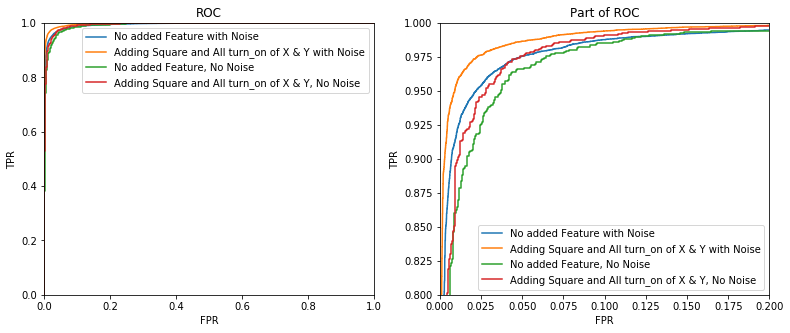

In [47]:
fig2a, axes_arr = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
ax1=axes_arr[0]
ax1.set_title('ROC'); ax1.set_xlabel("FPR"); ax1.set_ylabel("TPR");
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
ax1.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
ax1.plot(fpr3te,tpr3te, label="Adding Square and All turn_on of X & Y with Noise")

fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
ax1.plot(fpr1Tte,tpr1Tte, label="No added Feature, No Noise")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
ax1.plot(fprTte,tprTte, label="Adding Square and All turn_on of X & Y, No Noise")

ax1.set_xlim([-0.0, 1.0]);
ax1.set_ylim([-0.0, 1.0]);
ax1.legend();

ax2=axes_arr[1]
ax2.set_title('Part of ROC'); ax2.set_xlabel("FPR"); ax2.set_ylabel("TPR");
ax2.plot(fpr2te,tpr2te, label="No added Feature with Noise")

ax2.plot(fpr3te,tpr3te, label="Adding Square and All turn_on of X & Y with Noise")

ax2.plot(fpr1Tte,tpr1Tte, label="No added Feature, No Noise")

ax2.plot(fprTte,tprTte, label="Adding Square and All turn_on of X & Y, No Noise")

ax2.set_xlim([0.0, 0.2]);
ax2.set_ylim([0.8, 1.0]);
ax2.legend();

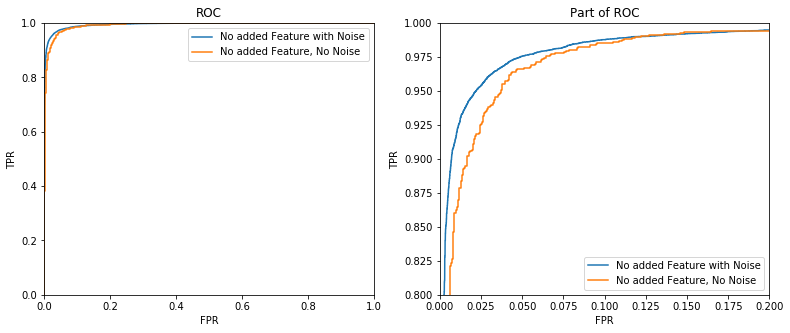

In [49]:
fig2a, axes_arr = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
ax1=axes_arr[0]
ax1.set_title('ROC'); ax1.set_xlabel("FPR"); ax1.set_ylabel("TPR");
ax1.plot(fpr2te,tpr2te, label="No added Feature with Noise")

ax1.plot(fpr1Tte,tpr1Tte, label="No added Feature, No Noise")

ax1.set_xlim([-0.0, 1.0]);
ax1.set_ylim([-0.0, 1.0]);
ax1.legend();

ax2=axes_arr[1]
ax2.set_title('Part of ROC'); ax2.set_xlabel("FPR"); ax2.set_ylabel("TPR");
ax2.plot(fpr2te,tpr2te, label="No added Feature with Noise")

ax2.plot(fpr1Tte,tpr1Tte, label="No added Feature, No Noise")

ax2.set_xlim([0.0, 0.2]);
ax2.set_ylim([0.8, 1.0]);
ax2.legend();



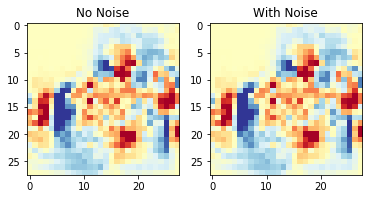

In [54]:
fig3b, axes_arr = plt.subplots(nrows=1, ncols=2)
w1=orig_lr0.w_G[:-1]
ax1=axes_arr[0]; ax1.set_title('No Noise');
ax1.imshow(w1.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')

w2=orig_lr22.w_G[:-1]
ax2=axes_arr[1]; ax2.set_title('With Noise');
ax2.imshow(w1.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')
plt.show()

In [21]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = orig_lr1.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba18O_test.txt', yproba1_test_N)

TurnOn Loaded 0.0
(1, 2000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Square Loaded!


0.385 0.993995

In [36]:
#x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr1.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba18N_test.txt', yproba1_test_N)

TurnOn Loaded 0.0
(1, 2000)
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Y Loaded 0.0
TurnOnOnce Y Loaded
Square Loaded!


0.0375 0.995576

In [30]:
#x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = orig_lr22.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba18O2_test.txt', yproba1_test_N)

0.375 0.993732

In [59]:
#Save Weights:
W00=orig_lr0.w_G
print(W00)
W01=orig_lr1.w_G
np.savetxt('trained_weights/Orig_No_Noise.txt', W00)
np.savetxt('trained_weights/Orig_With_Noise.txt', W01)

[ 0.00000000e+00  1.19179450e-06  1.19179450e-06  1.19179450e-06
  9.31899857e-04  9.30819066e-04  9.36699488e-04  9.49960817e-04
  9.30729740e-04  1.37043790e-03  2.90640360e-03  2.36005823e-03
  1.84390756e-02  2.64659726e-02 -3.35344986e-02 -1.39446268e-02
  2.35198802e-02  8.80809520e-02  8.28684264e-02  8.34217266e-02
  5.48979693e-02  2.20185429e-02  1.89024755e-02  2.12148214e-02
  1.24235655e-02  3.67807122e-02  2.82424559e-02  4.40484758e-05
  0.00000000e+00  1.19179450e-06  1.19179450e-06  1.19179450e-06
  9.30781951e-04  9.33584930e-04  1.16066609e-03  1.02026923e-03
  1.05924100e-03  2.09048610e-03  4.05163461e-03  1.28896394e-02
  6.94427884e-02  7.27734278e-02  5.35549100e-02  1.11804854e-01
  1.31663456e-01  1.00095299e-01  7.91141228e-02  1.08516045e-01
  1.11669288e-01  4.03081480e-02  5.56383721e-02  6.68796433e-02
 -2.10978866e-03  3.03941011e-02  1.62360709e-02 -1.90920961e-02
  0.00000000e+00  1.19179450e-06  1.19179450e-06  1.19179450e-06
  9.42716667e-04  1.17066